In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# ruff :noqa: E402

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Background

# Dataset

In [ ]:
sns.set_style("whitegrid")
%matplotlib inline


SEED : int = 31415
def set_seed(seed: int = SEED) -> None:
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)


set_seed()

In [ ]:
df = pd.read_csv("data/AB_US_2023.csv")

In [ ]:
df.head()

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171745 entries, 2 to 232146
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood                   171745 non-null  float64
 1   latitude                        171745 non-null  float64
 2   longitude                       171745 non-null  float64
 3   room_type                       171745 non-null  int64  
 4   price                           171745 non-null  int64  
 5   minimum_nights                  171745 non-null  int64  
 6   number_of_reviews               171745 non-null  int64  
 7   last_review                     171745 non-null  int64  
 8   reviews_per_month               171745 non-null  float64
 9   calculated_host_listings_count  171745 non-null  int64  
 10  availability_365                171745 non-null  int64  
 11  number_of_reviews_ltm           171745 non-null  int64  
 12  city                 

In [ ]:
df.describe(include="all")

In [167]:
df.shape

count    171745.000000
mean          0.006455
std           0.010772
min           0.000006
25%           0.000809
50%           0.002236
75%           0.007476
max           0.047541
Name: neighbourhood, dtype: float64

In [ ]:
df_vis = df.drop(columns=["name", "id", "host_name", "host_id"])
# drop rows with missing price or price == 0
df_vis = df_vis.dropna(subset=["price"])
df_vis = df_vis[df_vis["price"] > 0]


In [166]:
df_vis["room_type"].value_counts()

room_type
1    169142
0     59758
2      2276
3       893
Name: count, dtype: int64

In [ ]:
import missingno as msno

msno.matrix(df_vis, figsize=(10, 5), fontsize=12)

In [ ]:
# map room_type to int for visualization
df_vis["room_type"] = df_vis["room_type"].map(
    {"Private room": 0, "Entire home/apt": 1, "Shared room": 2, "Hotel room": 3}
)


In [ ]:
# plot scatter plot between all pairs of variables
# sns.pairplot(df_vis, diag_kind="kde")


In [ ]:
df_vis["room_type"].value_counts()

In [ ]:
sns.violinplot(x="room_type", data=df_vis)

In [ ]:
sns.scatterplot(x="number_of_reviews", y="price", data=df_vis, hue="room_type")

In [ ]:
sns.histplot(df_vis["price"], legend=True, label="price", binrange=(-20, 1500), cbar=True)

In [ ]:
sns.jointplot(x="number_of_reviews", y="price", data=df_vis, hue="room_type")

### violinplot

In [ ]:
sns.violinplot(x="room_type",data=df_vis)

In [ ]:
sns.violinplot(x="price",data=df_vis)

In [ ]:
sns.violinplot(df_vis["minimum_nights"])

# Objective/Goal


# Methodology

## Data Cleaning/Preprocessing

In [ ]:
df.shape

In [ ]:
# check if there are any duplicates except for the id column
df.duplicated(subset=df.columns.difference(["id"])).sum()

In [ ]:
# remove duplicates
df = df.drop_duplicates(subset=df.columns.difference(["id"]))

In [ ]:
df.shape

In [ ]:
## remove unnecessary columns
unnecessary_columns = [
    "host_name",
    "host_id",
    "id"
]

df = df.drop(columns=unnecessary_columns)



In [ ]:
df.shape

In [ ]:
# remove columns with more than 50% missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / df.shape[0]
missing_values = missing_values[missing_values > 0.5]
missing_values


In [ ]:
# remove columns with more than 50% missing values
df = df.drop(columns=missing_values.index)


In [ ]:
df.shape

In [ ]:
import missingno as msno

msno.matrix(df, figsize=(10, 5), fontsize=12)

#### Data Type Conversion

In [ ]:
df.dtypes

In [ ]:
df["last_review"] = pd.to_datetime(df["last_review"])

In [ ]:
# columns with positive values
positive_columns = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
]

for column in positive_columns:
    if any(df[column] < 0):
        print(f"Column {column} has negative values")

### Outlier Removal

#### Price

In [ ]:
# remove outliers for price
# boxplot
sns.violinplot(x="price", data=df)

In [ ]:
df["price"].describe()

In [ ]:
# use interquartile range to remove outliers
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
print(q1, q3)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

# remove outliers
df = df[(df["price"] > lower_bound) & (df["price"] < upper_bound)]


In [ ]:
# boxplot
sns.violinplot(x=df["price"])

#### Number of Reviews


In [ ]:
df["number_of_reviews"].describe()

In [ ]:
df["number_of_reviews"].value_counts()

In [ ]:
# violinplot
sns.violinplot(x=df["number_of_reviews"])

In [ ]:
# use interquartile range to remove outliers
q1 = df["number_of_reviews"].quantile(0.25)
q3 = df["number_of_reviews"].quantile(0.75)
print(q1, q3)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

# remove outliers
df = df[(df["number_of_reviews"] > lower_bound) & (df["number_of_reviews"] < upper_bound)]


In [ ]:
# violinplot
sns.violinplot(x=df["number_of_reviews"])


In [ ]:
df["number_of_reviews"].describe()

#### Minimum Nights

In [ ]:
df["number_of_reviews"].value_counts()

In [ ]:
df["number_of_reviews"].describe()

In [ ]:
sns.violinplot(x=df["number_of_reviews"])

In [ ]:
# use interquartile range to remove outliers
q1 = df["number_of_reviews"].quantile(0.25)
q3 = df["number_of_reviews"].quantile(0.75)
print(q1, q3)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

# remove outliers
df = df[(df["number_of_reviews"] > lower_bound) & (df["number_of_reviews"] < upper_bound)]


In [ ]:
# violinplot
sns.violinplot(x=df["number_of_reviews"])


In [ ]:
df["number_of_reviews"].describe()

In [ ]:
df["number_of_reviews"].value_counts()

In [ ]:
# sns.pairplot(df, diag_kind="kde")

In [ ]:
# missing values
df.isnull().sum()


In [ ]:
# get number of reviews for rows with missing reviews_per_month and last_review
df[df["reviews_per_month"].isnull()]["number_of_reviews"].value_counts()

We can see that the reason why reviews_per_month or last_review is null is because the host has never received a review. Therefore, we can replace the null values with 0 or the mode in the case of last_review.

In [ ]:
df["reviews_per_month"].fillna(0, inplace=True)

In [ ]:
# last_review fillna with mode
df["last_review"].fillna(df["last_review"].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
# fill missing values for name column with "No name"
df["name"].fillna("No name", inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
msno.matrix(df, figsize=(10, 5), fontsize=12)

## Encoding

In [ ]:
# encode categorical variables
# room_type
# order: Private room, Entire home/apt, Shared room, Hotel room

# encode neighbourhood_group with one-hot encoding
freq_neighbourhood = df["neighbourhood"].value_counts(normalize=True)
df["neighbourhood"] = df["neighbourhood"].map(freq_neighbourhood)

freq_city = df["city"].value_counts(normalize=True)
df["city"] = df["city"].map(freq_city)


# chnage last review from datetime to float
df["last_review"] = df["last_review"].astype("int64")

In [ ]:
# map room_type to int
df["room_type"] = df["room_type"].map(
    {"Private room": 0, "Entire home/apt": 1, "Shared room": 2, "Hotel room": 3}
)

In [ ]:
# pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#TODO: feature extraction from name column
# will drop name column for now
df = df.drop(columns=["name"])


X, y = df.drop(columns=["price"]), df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)


In [ ]:
X .shape

In [ ]:
# plot correlation matrix heatmap
corr = X.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")


In [ ]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=.98)),
    ]
)

# fit and transform on train dat
pca_X_train = pipeline.fit_transform(X_train)

# transform on test data
pca_X_test = pipeline.transform(X_test)




In [ ]:
pca_X_train.shape

In [ ]:
X_train.shape

In [ ]:
pca_X_train = pd.DataFrame(pca_X_train, columns=[f"pca_{i}" for i in range(pca_X_train.shape[1])])

In [ ]:
# correlation matrix heatmap
corr = pca_X_train.corr()
sns.heatmap(corr, cmap="coolwarm")

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn import metrics

def print_evaluation(true, pred):
    print('MSE: ', mse(true, pred))
    print('R2: ', r2_score(true, pred))
    print('RMSE: ', np.sqrt(mse(true, pred)))
    print('MAE: ', metrics.mean_absolute_error(true, pred))

def plot_actual_vs_predicted(true, pred):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(true, label='Actual')
    sns.kdeplot(pred, label='Predicted')
    plt.legend()
    plt.show()

In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor 

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        #("pca", PCA()),
        ("rf", RandomForestRegressor(
            n_jobs=-1))
    ]
)

pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)

In [ ]:
# use KNN to predict
from sklearn.neighbors import KNeighborsRegressor

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        # ("pca", PCA()),
        ("knn", KNeighborsRegressor(
            n_jobs=-1))
    ]
)

pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)

In [ ]:
# Use Polynomial Regression to predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        # ("pca", PCA()),
        ("poly", PolynomialFeatures()),
        ("lr", LinearRegression())
    ]
)

pipeline.fit(X_train, y_train)

# evaluate on test data
y_pred = pipeline.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("lgbm", LGBMRegressor())
    ]
)

param_grid = {
    "lgbm__n_estimators": [100, 200, 300],
    "lgbm__max_depth": [3, 5, 7],
    "lgbm__learning_rate": [0.01, 0.1, 0.5],
}

search = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=10,
    cv=5,
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train)

# evaluate on test data
y_pred = search.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)

In [ ]:
import xgboost as xgb

# pipeline = Pipeline(
#     [
#         ("scaler", StandardScaler()),
#         # ("pca", PCA()),
#         ("xgb", xgb.XGBRegressor())
#     ]
# )

# pipeline.fit(X_train, y_train)

# # evaluate on test data
# y_pred = pipeline.predict(X_test)
# print_evaluation(y_test, y_pred)
# plot_actual_vs_predicted(y_test, y_pred)

# Use RandomizedSearchCV to find best hyperparameters for XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        # ("pca", PCA()),
        ("xgb", xgb.XGBRegressor())
    ]
)

param_grid = {
    'xgb__n_estimators': [100, 500, 1000],
    'xgb__max_depth': [3, 5, 10],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__gamma': [0, 0.25, 1.0],
    'xgb__reg_lambda': [0, 1.0, 10.0],
    'xgb__scale_pos_weight': [1, 3, 5]
}

search = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train)

# evaluate on test data
y_pred = search.predict(X_test)
print_evaluation(y_test, y_pred)
plot_actual_vs_predicted(y_test, y_pred)

# Clustering

In [180]:
# select features to cluster
cluster_df = df[["latitude", "longitude"]]

Text(0, 0.5, 'WCSS')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

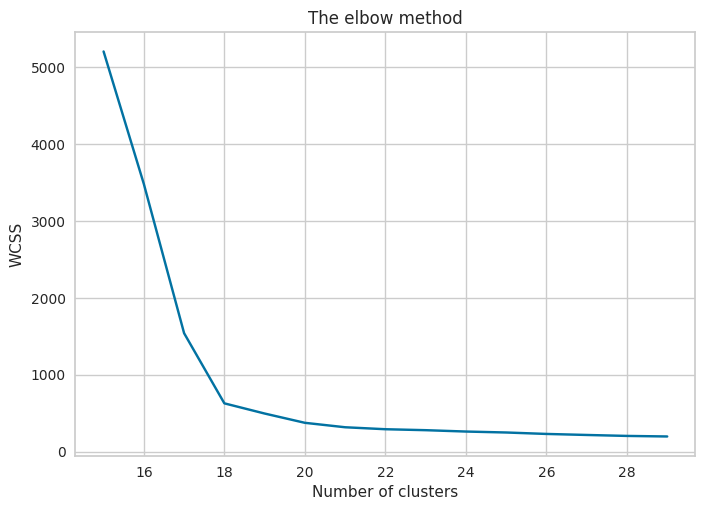

In [183]:
from sklearn.cluster import KMeans

scaled_df = cluster_df

# sample scaled_df randomly
scaled_df = scaled_df.sample(frac=0.1, replace=False, random_state=SEED)

# test kmeans using elbow method
wcss = []

for i in range(15, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(15, 30), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares


processing: i=5


processing: i=6
processing: i=7
processing: i=8
processing: i=9
processing: i=10
processing: i=11
processing: i=12
processing: i=13
processing: i=14
processing: i=15
processing: i=16
processing: i=17
processing: i=18
processing: i=19
processing: i=20
processing: i=21
processing: i=22
processing: i=23
processing: i=24
processing: i=25
processing: i=26
processing: i=27
processing: i=28
processing: i=29
processing: i=30
processing: i=31
processing: i=32
processing: i=33
processing: i=34
processing: i=35
processing: i=36
processing: i=37
processing: i=38
processing: i=39


Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

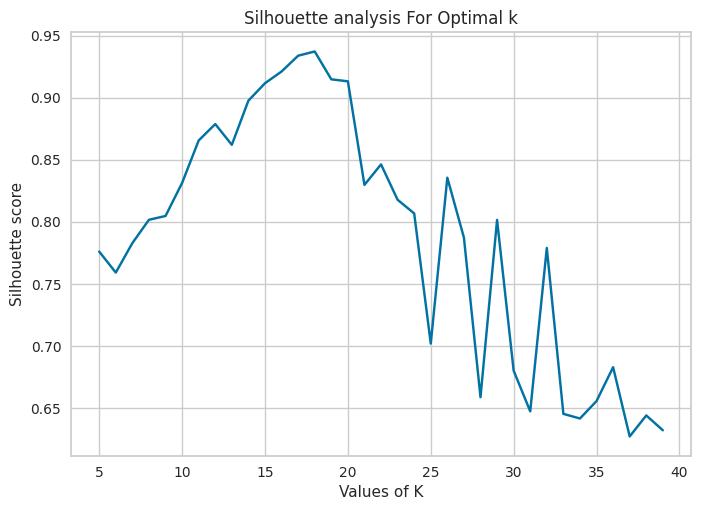

In [184]:
from sklearn.metrics import silhouette_score

avg_silhouette = []

for i in range(5, 40):
    print(f"processing: {i=}")
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(scaled_df, cluster_labels))

plt.plot(range(5, 40),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

Silhouetter Score: 0.937


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not fo

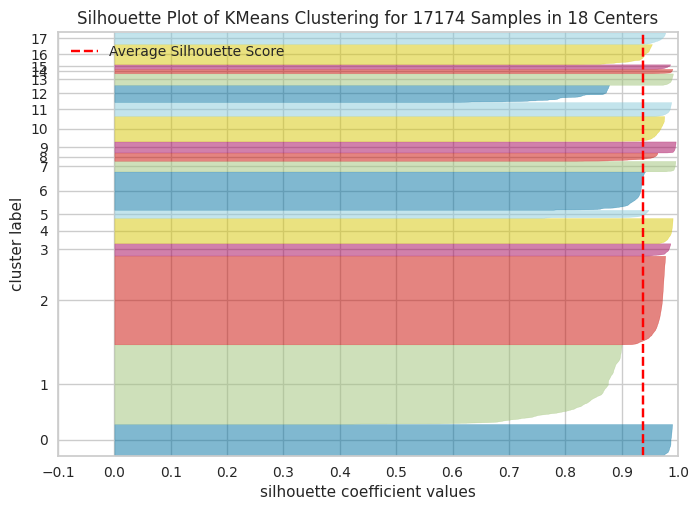

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 17174 Samples in 18 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [185]:
from yellowbrick.cluster import SilhouetteVisualizer

km = KMeans(n_clusters=18, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = km.fit_predict(scaled_df)
clusters = km.labels_

# calculate silhouette score on a sample of 10000 rows
score = silhouette_score(scaled_df, clusters)

print('Silhouetter Score: %.3f' % score)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick') #, ax=ax[q-1][mod])
visualizer.fit(scaled_df)
visualizer.show()

In [187]:
import folium

km = KMeans(n_clusters=18, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = km.fit_predict(cluster_df)
clusters = km.labels_
cluster_map = folium.Map([41.8781, -87.6298], zoom_start=4)
for i in range(km.cluster_centers_.shape[0]):
    num = sum(km.labels_ == i)
    folium.CircleMarker([km.cluster_centers_[i,0], km.cluster_centers_[i,1]],
                        radius=15,
                        popup=str(num) + ' Listings Associated with this Cluster',
                        fill_color="#3db7e4",
                        ).add_to(cluster_map)

cluster_map